In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\nandh\Downloads\rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Data Exploration and Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [5]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['SUBDIVISION'].value_counts()

SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [8]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [9]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [10]:
df.head(25)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.200000,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.60000,3373.2000,136.3,560.300000,1696.3,980.300000
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.200000,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.50000,3520.7000,159.8,458.300000,2185.9,716.700000
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.000000,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.00000,2957.4000,156.7,236.100000,1874.0,690.600000
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.000000,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.10000,3079.6000,24.1,506.900000,1977.6,571.000000
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.300000,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.70000,2566.7000,1.3,309.700000,1624.9,630.800000
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.000000,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.20000,2534.4000,36.6,556.100000,1465.8,475.900000
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.300000,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.60000,3347.9000,110.7,751.200000,1327.1,1158.900000
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.000000,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.90000,3576.4000,106.0,591.000000,2303.7,575.700000
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.300000,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.50000,2899.4000,49.3,520.100000,1701.0,629.000000
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.000000,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.10000,2687.2000,8.4,449.800000,1553.6,675.400000


In [11]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [12]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [13]:
df.shape

(4116, 19)

In [14]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

## Data Visualization

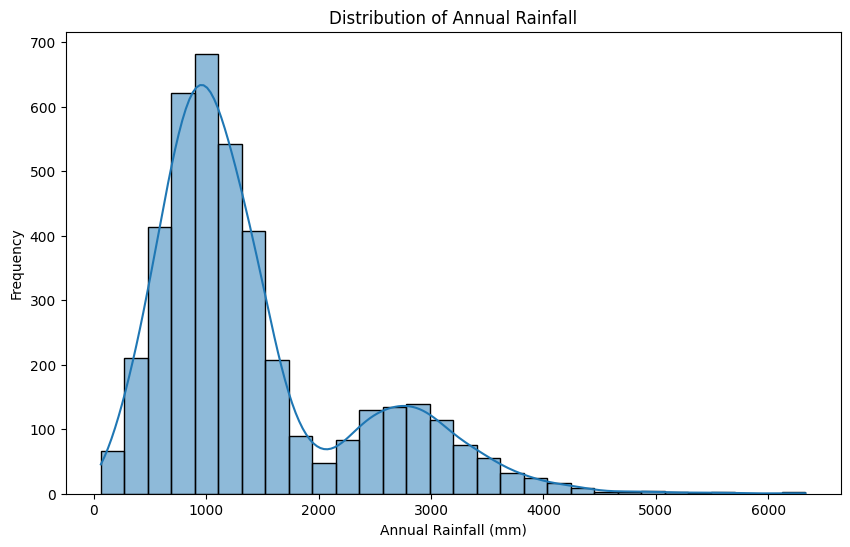

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ANNUAL'], bins=30, kde=True)
plt.title('Distribution of Annual Rainfall')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

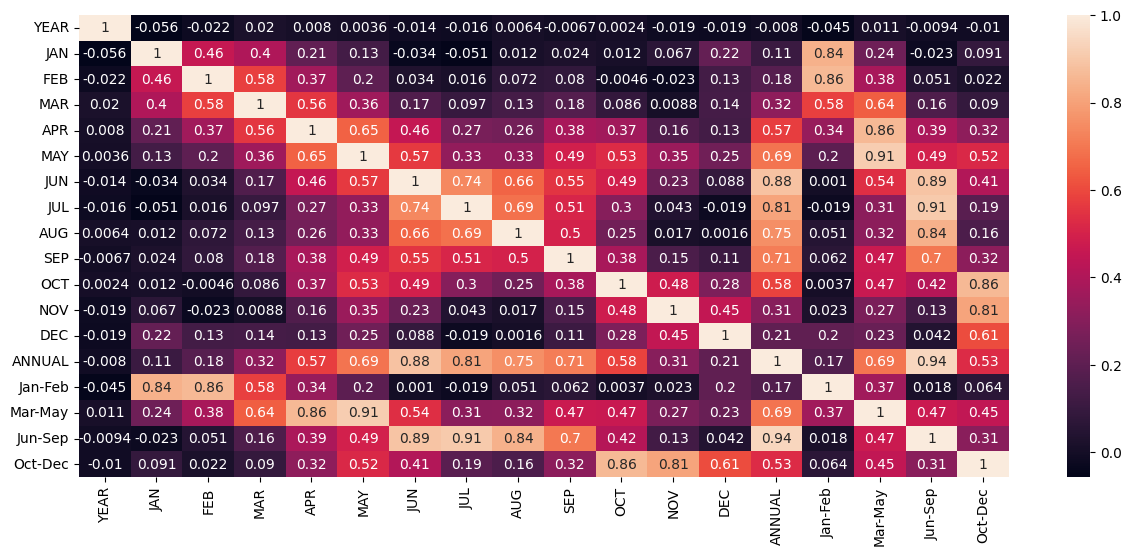

In [16]:
# Drop non-numeric columns

#Computes the pairwise correlation of columns and visualizes the correlation matrix using a heatmap.
#This helps identify relationships between variables.

numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(15,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

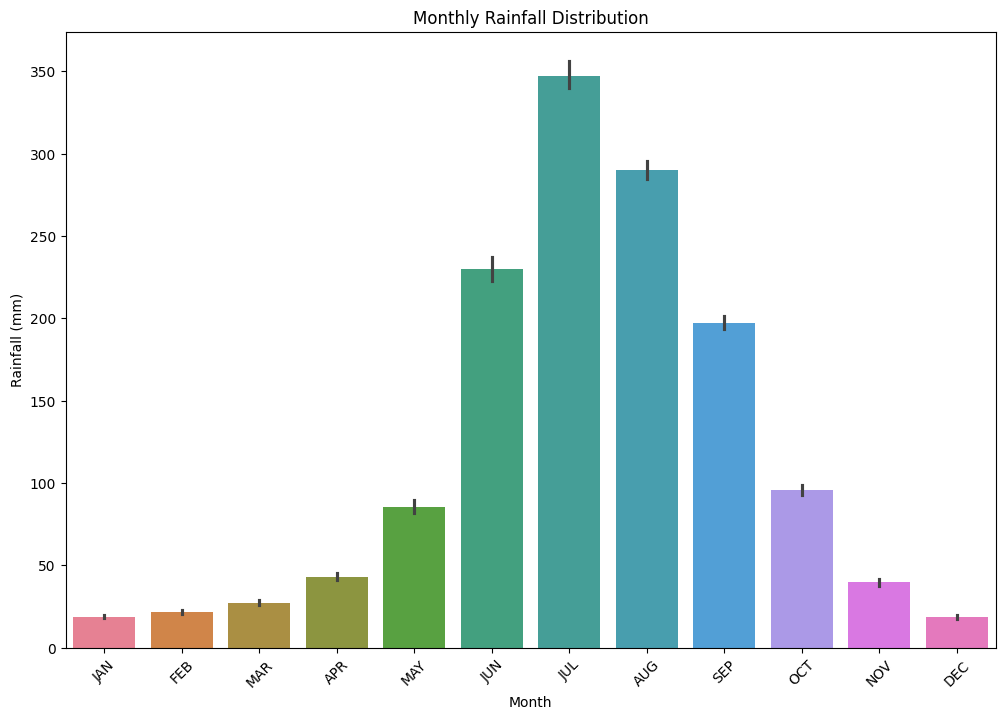

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()

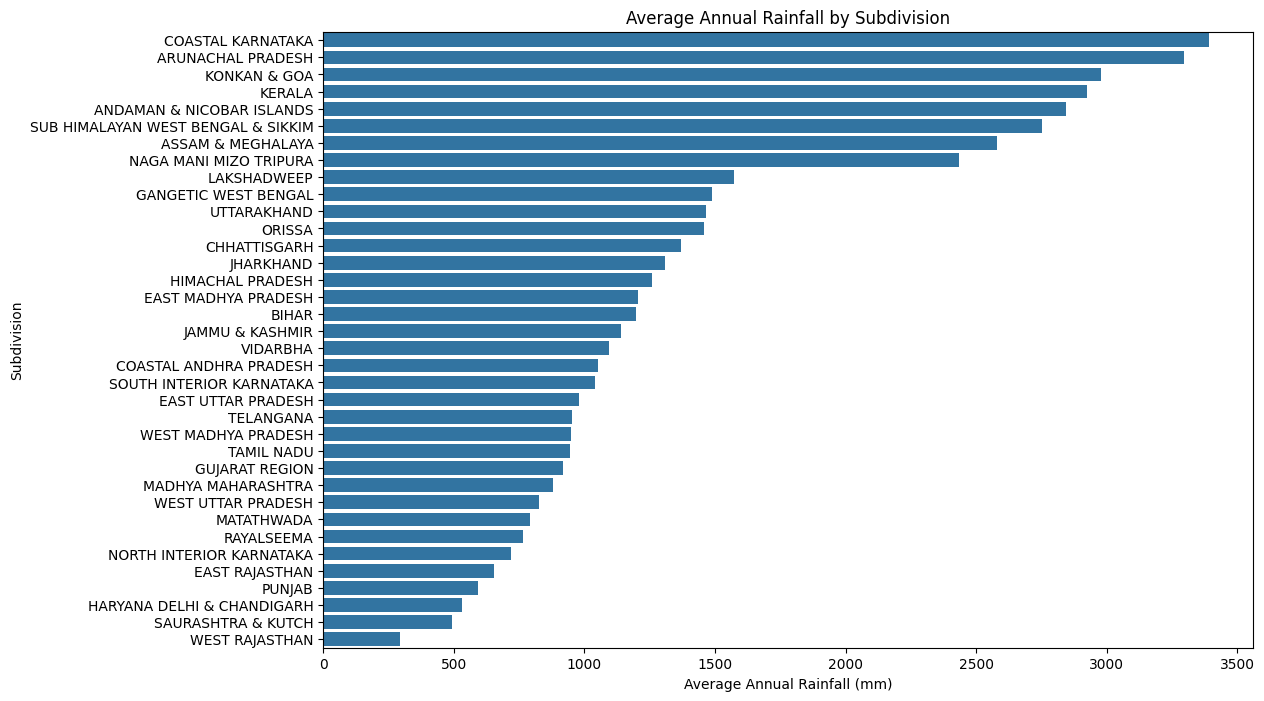

In [18]:
yearly_avg_rainfall = df.groupby('SUBDIVISION')['ANNUAL'].mean().reset_index()
yearly_avg_rainfall = yearly_avg_rainfall.sort_values(by='ANNUAL', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='ANNUAL', y='SUBDIVISION', data=yearly_avg_rainfall)
plt.title('Average Annual Rainfall by Subdivision')
plt.xlabel('Average Annual Rainfall (mm)')
plt.ylabel('Subdivision')
plt.show()

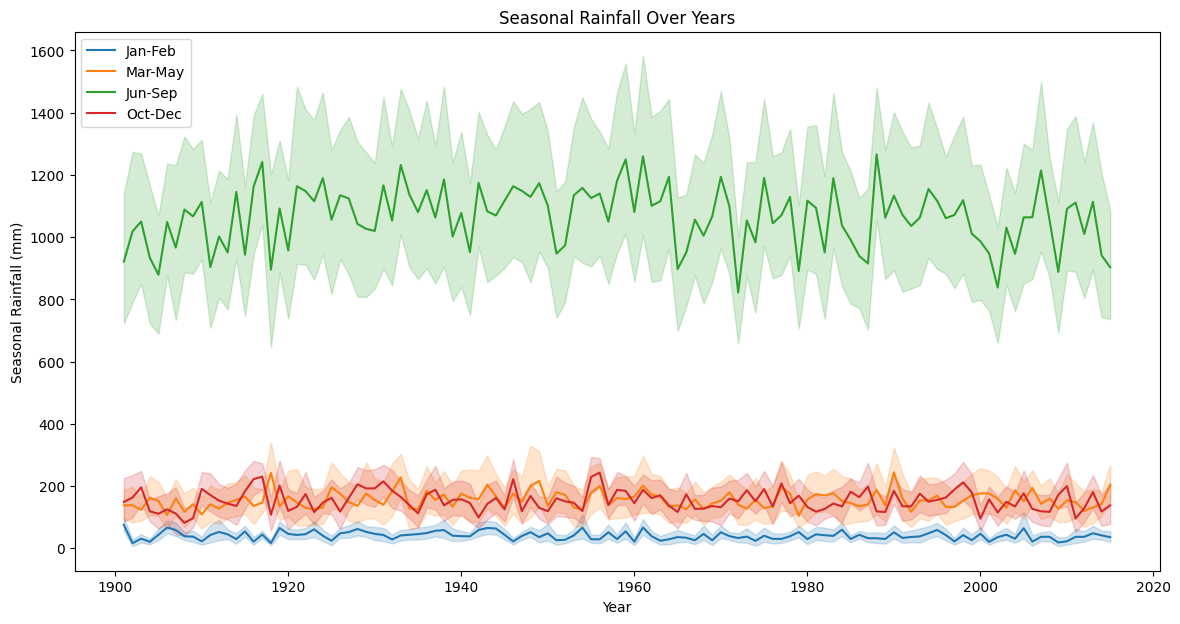

In [19]:
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
plt.figure(figsize=(14, 7))
for season in seasons:
    sns.lineplot(x='YEAR', y=season, data=df, label=season)
plt.title('Seasonal Rainfall Over Years')
plt.xlabel('Year')
plt.ylabel('Seasonal Rainfall (mm)')
plt.legend()
plt.show()

In [20]:
summary_stats = df.groupby('SUBDIVISION').agg({
    'ANNUAL': ['mean', 'std', 'min', 'max'],
    'Jan-Feb': 'mean',
    'Mar-May': 'mean',
    'Jun-Sep': 'mean',
    'Oct-Dec': 'mean'
}).reset_index()
summary_stats

SUBDIVISION       ANNUAL                          \
                                               mean          std        min   
0            ANDAMAN & NICOBAR ISLANDS  2844.725031   527.805347  1411.0089   
1                    ARUNACHAL PRADESH  3294.660344  1152.178143  1411.0089   
2                    ASSAM & MEGHALAYA  2580.695652   310.195411  1743.4000   
3                                BIHAR  1197.633913   194.643134   629.2000   
4                         CHHATTISGARH  1371.728696   210.692112   904.6000   
5               COASTAL ANDHRA PRADESH  1052.904348   190.383737   703.2000   
6                    COASTAL KARNATAKA  3391.040947   515.358970  1411.0089   
7                  EAST MADHYA PRADESH  1205.000000   219.501963   653.8000   
8                       EAST RAJASTHAN   655.215652   166.432887   273.6000   
9                   EAST UTTAR PRADESH   979.213043   203.635351   493.3000   
10                GANGETIC WEST BENGAL  1490.487826   229.490105  1015.1000   
11                      GUJARAT REGION   918.230435   278.415327   392.6000   
12          HARYANA DELHI & CHANDIGARH   530.496522   142.179518   234.7000   
13                    HIMACHAL PRADESH  1260.345217   247.316815   776.1000   
14                     JAMMU & KASHMIR  1142.043556   235.239345   657.0000   
15                           JHARKHAND  1309.303478   198.247705   697.1000   
16                              KERALA  2925.487826   422.112193  2068.8000   
17                        KONKAN & GOA  2977.686087   485.095477  1682.8000   
18                         LAKSHADWEEP  1573.529806   262.130676   992.6000   
19                  MADHYA MAHARASHTRA   880.233043   159.093258   438.0000   
20                          MATATHWADA   790.692174   189.209794   347.1000   
21              NAGA MANI MIZO TRIPURA  2433.619130   431.734909  1353.8000   
22            NORTH INTERIOR KARNATAKA   717.795652   134.042259   470.3000   
23                              ORISSA  1458.169565   187.109637   987.0000   
24                              PUNJAB   593.535652   163.357568   274.7000   
25                          RAYALSEEMA   766.206087   150.492105   433.4000   
26                  SAURASHTRA & KUTCH   495.161739   201.927928    92.7000   
27            SOUTH INTERIOR KARNATAKA  1040.391304   150.809939   733.3000   
28  SUB HIMALAYAN WEST BENGAL & SIKKIM  2752.217391   337.854553  1988.2000   
29                          TAMIL NADU   943.713043   166.017327   318.0000   
30                           TELANGANA   953.378261   205.925999   437.0000   
31                         UTTARAKHAND  1465.696522   264.025944   803.4000   
32                            VIDARBHA  1095.459130   203.520480   578.5000   
33                 WEST MADHYA PRADESH   948.416599   187.418829   509.4000   
34                      WEST RAJASTHAN   292.673043   108.842668    62.3000   
35                  WEST UTTAR PRADESH   827.114783   189.642855   371.9000   

               Jan-Feb     Mar-May      Jun-Sep     Oct-Dec  
       max        mean        mean         mean        mean  
0   3938.2   80.632727  453.894593  1689.179766  661.199104  
1   6331.1  137.409771  764.866016  2246.541748  251.408262  
2   3403.5   48.413043  623.687826  1720.590435  188.015652  
3   1660.4   27.776522   80.126957  1015.786087   73.953913  
4   1974.0   33.462609   53.092174  1204.500870   80.674783  
5   1712.4   20.404348  102.515652   655.141739  274.835652  
6   5553.9    3.696068  160.051304  2981.618261  260.775652  
7   1747.1   38.094783   30.096522  1076.018261   60.800000  
8   1350.4   11.837391   17.487826   602.998261   22.887826  
9   1545.5   31.887826   32.553913   861.486087   53.293913  
10  2099.8   35.042609  181.766087  1130.657391  143.018261  
11  1620.1    2.977391    8.161739   878.251304   28.834783  
12   986.7   34.331304   35.112174   437.786957   23.270435  
13  1919.2  175.082609  221.726957   775.664348   87.871304  
14  1732.5  217.482609  292.5521

### Analysis of rainfall data

In [21]:
V = df.loc[((df['SUBDIVISION'] == 'TELANGANA'))]
V.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3197,TELANGANA,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7,48.7,75.0,616.4,87.7
3198,TELANGANA,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4,0.0,18.2,532.0,80.2
3199,TELANGANA,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4,17.5,50.5,1042.9,172.4
3200,TELANGANA,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7,0.0,26.3,456.0,44.4
3201,TELANGANA,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9,4.3,72.6,628.4,19.6


In [22]:
V = df.loc[((df['SUBDIVISION'] == 'TAMIL NADU'))]
V.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2


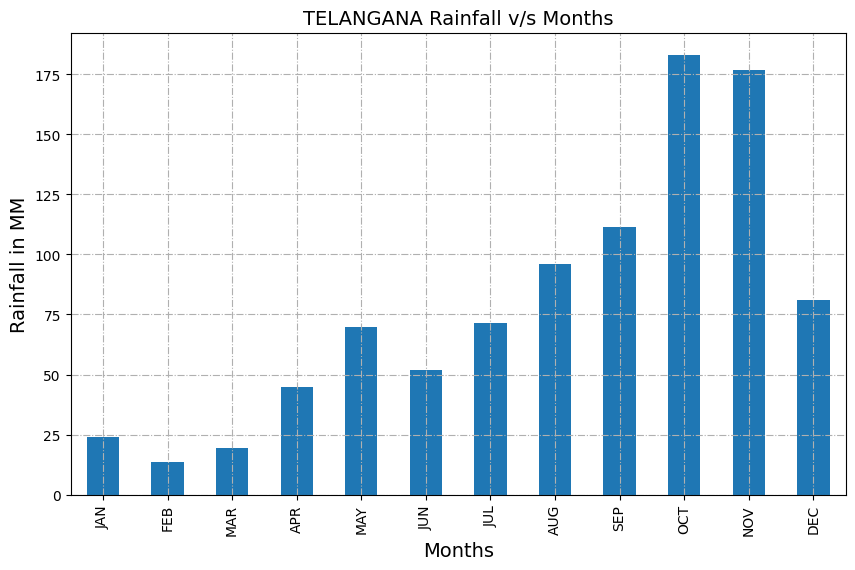

In [23]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("TELANGANA Rainfall v/s Months",size=14)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

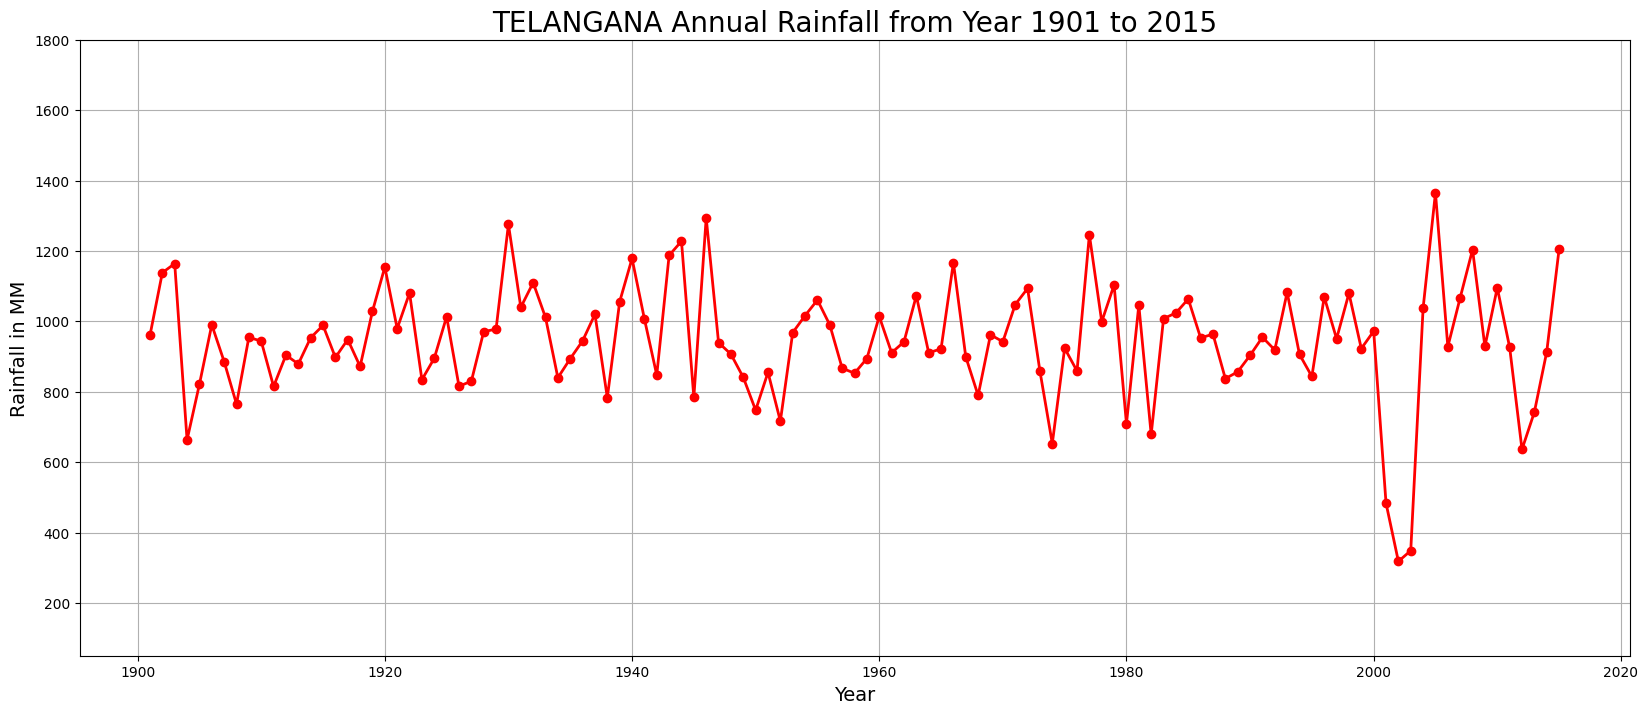

In [24]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('TELANGANA Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = (r"C:\Users\nandh\Downloads\rainfall in india 1901-2015.csv")
rainfall_data = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
rainfall_data.iloc[:, 2:] = imputer.fit_transform(rainfall_data.iloc[:, 2:])

# Feature and target selection
X = rainfall_data.drop(columns=['SUBDIVISION'])
y = rainfall_data['YEAR']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming X and y are your feature matrix and target vector
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'R-squared (Random Forest): {r2_rf}')



Mean Squared Error (Random Forest): 9.70873786406001e-07
Root Mean Squared Error (Random Forest): 0.000985329278163397
Mean Absolute Error (Random Forest): 9.70873786406884e-05
R-squared (Random Forest): 0.9999999991115585


In [27]:
# Create the report
Report = {'MSE': [mse_rf], 'RMSE': [rmse_rf], 'MAE': [mae_rf], 'R2': [r2_rf]}
Report = pd.DataFrame(Report)
Report.index = ['Random Forest']
print(Report)

                        MSE      RMSE       MAE   R2
Random Forest  9.708738e-07  0.000985  0.000097  1.0


In [28]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')



Mean Squared Error (XGBoost): 0.00025417482100644157
Root Mean Squared Error (XGBoost): 0.015942861129873823
Mean Absolute Error (XGBoost): 0.010573600102396845
R-squared (XGBoost): 0.9999997615814209


In [29]:
# Create the report
Report = {'MSE': [mse_xgb], 'RMSE': [rmse_xgb], 'MAE': [mae_xgb], 'R2': [r2_xgb]}
Report = pd.DataFrame(Report)
Report.index = ['XGBoost']
print(Report)

              MSE      RMSE       MAE   R2
XGBoost  0.000254  0.015943  0.010574  1.0


In [30]:
from catboost import CatBoostRegressor

# Initialize the CatBoost model
catboost_model = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)

# Train the model
catboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test_scaled)

# Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f'Mean Squared Error (CatBoost): {mse_catboost}')
print(f'Root Mean Squared Error (CatBoost): {rmse_catboost}')
print(f'Mean Absolute Error (CatBoost): {mae_catboost}')
print(f'R-squared (CatBoost): {r2_catboost}')




Mean Squared Error (CatBoost): 0.2997649769352798
Root Mean Squared Error (CatBoost): 0.5475079697459022
Mean Absolute Error (CatBoost): 0.41638480095770286
R-squared (CatBoost): 0.9997256866280464


In [31]:
# Create the report
Report = {'MSE': [mse_catboost], 'RMSE': [rmse_catboost], 'MAE': [mae_catboost], 'R2': [r2_catboost]}
Report = pd.DataFrame(Report)
Report.index = ['CAT Boost']
print(Report)

                MSE      RMSE       MAE        R2
CAT Boost  0.299765  0.547508  0.416385  0.999726


In [32]:
from sklearn.svm import SVR

# Assuming `rainfall_data` is your DataFrame
# Example: rainfall_data = pd.read_csv('your_data.csv')

# Prepare the data
X = rainfall_data.drop(columns=['SUBDIVISION'])
y = rainfall_data['YEAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'Mean Squared Error (SVM): {mse_svm}')
print(f'Root Mean Squared Error (SVM): {rmse_svm}')
print(f'Mean Absolute Error (SVM): {mae_svm}')
print(f'R-squared (SVM): {r2_svm}')



Mean Squared Error (SVM): 130.98000840145372
Root Mean Squared Error (SVM): 11.444649771900131
Mean Absolute Error (SVM): 6.459907116788906
R-squared (SVM): 0.8801408752601582


In [33]:
# Create the report
Report = {'MSE': [mse_svm], 'RMSE': [rmse_svm], 'MAE': [mae_svm], 'R2': [r2_svm]}
Report = pd.DataFrame(Report)
Report.index = ['SVM']
print(Report)

            MSE      RMSE       MAE        R2
SVM  130.980008  11.44465  6.459907  0.880141


In [34]:
import lightgbm as lgb
import contextlib
import sys

# Now train your LightGBM model and perform operations
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lgb = lgb_model.predict(X_test_scaled)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'Mean Squared Error (LightGBM): {mse_lgb}')
print(f'Root Mean Squared Error (LightGBM): {rmse_lgb}')
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')
print(f'R-squared (LightGBM): {r2_lgb}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4451
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 18
[LightGBM] [Info] Start training from score 1958.034933
Mean Squared Error (LightGBM): 7.90772900005561e-07
Root Mean Squared Error (LightGBM): 0.0008892541256612538
Mean Absolute Error (LightGBM): 0.0007652346967246519
R-squared (LightGBM): 0.9999999992763678


In [35]:
# Create the report
Report = {'MSE': [mse_lgb], 'RMSE': [rmse_lgb], 'MAE': [mae_lgb], 'R2': [r2_lgb]}
Report = pd.DataFrame(Report)
Report.index = ['Light GBM']
print(Report)

                    MSE      RMSE       MAE   R2
Light GBM  7.907729e-07  0.000889  0.000765  1.0


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
file_path = r"C:\Users\nandh\Downloads\rainfall in india 1901-2015.csv"
rainfall_data = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
rainfall_data.iloc[:, 2:] = imputer.fit_transform(rainfall_data.iloc[:, 2:])

# Feature and target selection
X = rainfall_data.drop(columns=['SUBDIVISION'])
y = rainfall_data['YEAR']


In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4451
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 18
[LightGBM] [Info] Start training from score 1958.034933


LGBMRegressor(random_state=42)

In [39]:
# Predictions and evaluation
y_pred_lgb = lgb_model.predict(X_test_scaled)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'Mean Squared Error (LightGBM): {mse_lgb}')
print(f'Root Mean Squared Error (LightGBM): {rmse_lgb}')
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')
print(f'R-squared (LightGBM): {r2_lgb}')


Mean Squared Error (LightGBM): 7.90772900005561e-07
Root Mean Squared Error (LightGBM): 0.0008892541256612538
Mean Absolute Error (LightGBM): 0.0007652346967246519
R-squared (LightGBM): 0.9999999992763678


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
file_path = r"C:\Users\nandh\Downloads\rainfall in india 1901-2015.csv"
rainfall_data = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
rainfall_data.iloc[:, 2:] = imputer.fit_transform(rainfall_data.iloc[:, 2:])

# Feature and target selection
X = rainfall_data.drop(columns=['SUBDIVISION', 'YEAR'])
y = rainfall_data['ANNUAL']  # Use ANNUAL rainfall as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lgb = lgb_model.predict(X_test_scaled)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'Mean Squared Error (LightGBM): {mse_lgb}')
print(f'Root Mean Squared Error (LightGBM): {rmse_lgb}')
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')
print(f'R-squared (LightGBM): {r2_lgb}')

def predict_future_rainfall(model, scaler, future_data):
    # Ensure the future_data has the same columns in the same order as X_train
    future_data = future_data[X.columns]
    # Scale the future data
    future_data_scaled = scaler.transform(future_data)
    # Predict future rainfall
    future_prediction = model.predict(future_data_scaled)
    return future_prediction

# Function to get user input for future data
def get_user_input():
    user_input = {}
    for column in X.columns:
        value = float(input(f"Enter value for {column}: "))
        user_input[column] = [value]
    return pd.DataFrame(user_input)

# Get user input
future_data = get_user_input()

# Print the user input
print("User Input Data:")
print(future_data)

# Predict future rainfall
future_rainfall = predict_future_rainfall(lgb_model, scaler, future_data)
print(f'Predicted Rainfall: {future_rainfall[0]}')
24
# Function to get user input for future data
def get_user_input(data_so_far=None):
    if data_so_far is None:
        user_input = {}
    else:
        user_input = data_so_far.copy()
        
    for column in X.columns:
        if column not in user_input:
            value = float(input(f"Enter value for {column}: "))
            user_input[column] = [value]
            
        print("Current Data:")
        print(pd.DataFrame(user_input))

    return pd.DataFrame(user_input)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 17
[LightGBM] [Info] Start training from score 1401.529618
Mean Squared Error (LightGBM): 2670.4068911836894
Root Mean Squared Error (LightGBM): 51.67597982799832
Mean Absolute Error (LightGBM): 9.475289117538665
R-squared (LightGBM): 0.9969481860753592


ValueError: could not convert string to float: ''

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
file_path = r"C:\Users\nandh\Downloads\rainfall in india 1901-2015.csv"
rainfall_data = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
rainfall_data.iloc[:, 2:] = imputer.fit_transform(rainfall_data.iloc[:, 2:])

# Feature and target selection
X = rainfall_data.drop(columns=['SUBDIVISION', 'YEAR', 'ANNUAL'])
y = rainfall_data['ANNUAL']  # Use ANNUAL rainfall as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Function to predict future rainfall
def predict_future_rainfall(model, scaler, future_data):
    # Ensure the future_data has the same columns in the same order as X_train
    future_data_scaled = scaler.transform(future_data)
    # Predict future rainfall
    future_prediction = model.predict(future_data_scaled)
    return future_prediction

# Function to get user input for future data
def get_user_input():
    user_input = {}
    for column in X.columns:
        value = float(input(f"Enter value for {column}: "))
        user_input[column] = [value]
    
    # Adding YEAR and SUBDIVISION (state) input
    user_input['YEAR'] = int(input("Enter the year: "))
    user_input['SUBDIVISION'] = input("Enter the subdivision (state): ")

    return pd.DataFrame(user_input)

# Get user input for future data
future_data = get_user_input()

# Print the user input
print("\nUser Input Data:")
print(future_data)

# Predict future rainfall
future_rainfall = predict_future_rainfall(lgb_model, scaler, future_data[X.columns])
print(f'\nPredicted Rainfall: {future_rainfall[0]} mm')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 16
[LightGBM] [Info] Start training from score 1401.529618

User Input Data:
     JAN  FEB   MAR    APR     MAY    JUN    JUL    AUG    SEP    OCT    NOV  \
0  228.7  5.6  33.0  108.3  2758.0  349.1  389.4  414.7  372.8  263.0  205.9   

     DEC  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  YEAR                 SUBDIVISION  
0  243.7     24.2   4171.0   1526.0    712.6  2017  Andaman & Nichobar Islands  

Predicted Rainfall: 3244.59866079811 mm
